In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
import sys
sys.path.append(os.path.abspath("../.."))
from assets.modules.materials import *
from assets.modules.shapes import *

In [2]:
def plot_stress_strain_curves(materials:list[Material], figsize:tuple=(6, 4)):
    plt.figure(figsize=figsize)
    
    for material in materials:
        eps_u = material.eps_u
        strain = np.linspace(-eps_u, eps_u, 1000) 
        stress = material.stress(strain)
        plt.plot(strain, stress, label=material.name)

    plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.xlabel("Strain (ε)")
    plt.ylabel("Stress (σ)")
    plt.legend()  
    plt.title("Stress-Strain Curve")
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

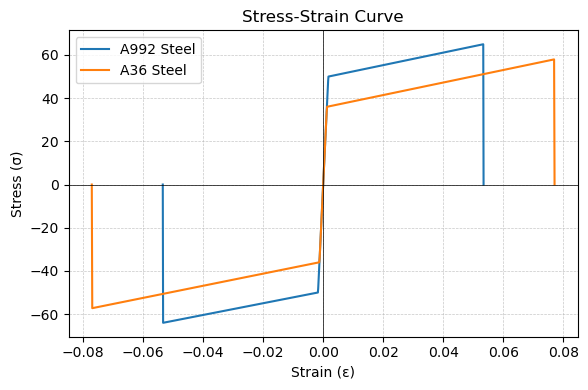

In [3]:

a992 = BilinearA992Steel()
a36 = BilinearA36Steel()

plot_stress_strain_curves([a992, a36])


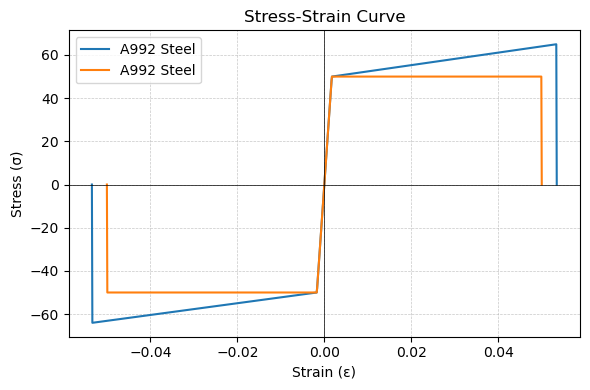

In [4]:
a992 = BilinearA992Steel()
a992_0 = BilinearA992Steel(alpha=0)

plot_stress_strain_curves([a992, a992_0])

Center: Point(x=0, y=0)
Area: 10
Moment of intertia (angle=0, pivot=None): (0.8333333333333286, 83.33333333333333, 0.0)
Moment of intertia (angle=45, pivot=None): (42.08333333333333, 42.08333333333333, -41.25)
Moment of intertia (pivot=(10, -5)): (250.83333333333331, 1083.3333333333333, -500.0)
Moment of intertia (angle=45, pivot=(10, -5)): (292.0833333333333, 1042.0833333333333, -541.25)


<Axes: >

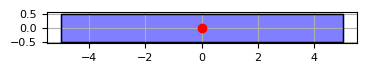

In [5]:
c1 = Point(0,0)

r1 = Rectangle(10, 1, c1)
print(f"Center: {r1.center}")
print(f"Area: {r1.area}")
print(f"Moment of intertia (angle=0, pivot=None): {r1.moment_inertia()}")
print(f"Moment of intertia (angle=45, pivot=None): {r1.moment_inertia(angle_deg=45)}")
print(f"Moment of intertia (pivot=(10, -5)): {r1.moment_inertia(pivot=(10, -5))}")
print(f"Moment of intertia (angle=45, pivot=(10, -5)): {r1.moment_inertia(angle_deg=45, pivot=(10, -5))}")
r1.plot()

<Axes: >

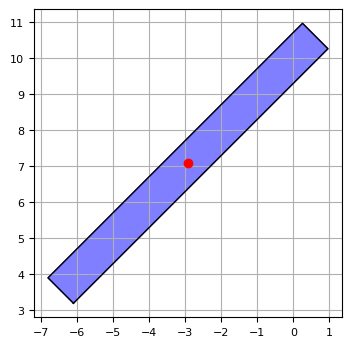

In [6]:
r1.rotate(45, pivot=(-10,0))
r1.plot()

In [7]:
top_flange = Rectangle(10, 0.75) # bottom flange is the same
web = Rectangle(0.25, 20)
params = ISectionParams(top_flange, web)
sec1 = ISection(params)
sec1.components

{'top_flange': Rectangle(width=10, height=0.75, center=Point(x=0.0, y=10.375), rotation=0),
 'bottom_flange': Rectangle(width=10, height=0.75, center=Point(x=0.0, y=-10.375), rotation=0),
 'web': Rectangle(width=0.25, height=20, center=Point(x=0.0, y=0.0), rotation=0)}

In [8]:
print(f"top flange area: {top_flange.area}")
print(f"top flange moment of inertia: {top_flange.moment_inertia()}")

print(f"web area: {web.area}")
print(f"web moment of inertia: {web.moment_inertia()}")


top flange area: 7.5
top flange moment of inertia: (0.3515625, 62.5, 0.0)
web area: 5.0
web moment of inertia: (166.66666666666666, 0.026041666666657193, 0.0)


top flange coordinates: Point(x=0.0, y=10.375)
web coordinates: Point(x=0.0, y=0.0)
bottom flange coordinates: Point(x=0.0, y=-10.375)

Center: Point(x=0.0, y=0.0)
Area: 20.0
top_flange: ix: 838.730, iy: 31.426, ixy: -31.074
bottom_flange: ix: 838.730, iy: 31.426, ixy: -31.074
web: ix: 83.346, iy: 83.346, ixy: 83.320
Moment of intertia (angle=45, pivot=None): (1760.8072916666667, 146.19791666666666, 21.171875)


<Axes: >

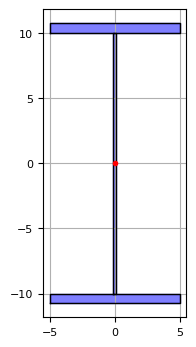

In [9]:
print(f"top flange coordinates: {sec1._top_flange.center}")
print(f"web coordinates: {sec1._web.center}")
print(f"bottom flange coordinates: {sec1._bottom_flange.center}")
print()
print(f"Center: {sec1.center}")
print(f"Area: {sec1.area}")
# print(f"Moment of intertia (angle=0, pivot=None): {sec1.moment_inertia()}")
print(f"Moment of intertia (angle=45, pivot=None): {sec1.moment_inertia(angle_deg=45)}")
# print(f"Moment of intertia (pivot=(10, -5)): {sec1.moment_inertia(pivot=(10, -5))}")
# print(f"Moment of intertia (angle=45, pivot=(10, -5)): {sec1.moment_inertia(angle_deg=45, pivot=(10, -5))}")
sec1.plot(linewidth=1, markersize=3)

{'top_flange': Rectangle(width=10, height=0.75, center=Point(x=-5.187499999999999, y=8.985013564263552), rotation=30), 'bottom_flange': Rectangle(width=10, height=0.75, center=Point(x=5.187499999999999, y=-8.985013564263552), rotation=30), 'web': Rectangle(width=0.25, height=20, center=Point(x=0.0, y=0.0), rotation=30)}


<Axes: >

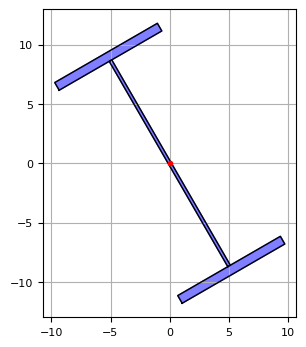

In [10]:
sec1.rotate(30, (0,0))
print(sec1.components)
sec1.plot(linewidth=1, markersize=3)

Point(x=0.0, y=0.0)
Point(x=5.0, y=5.0)
(-5.0, 14.696428571428571)
Point(x=8.927478208013607, y=14.911085987145917)


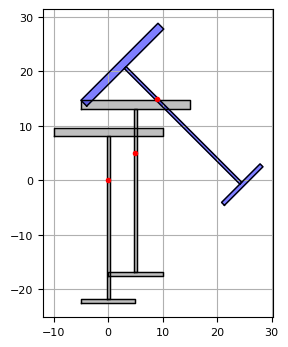

In [11]:
top_flange = Rectangle(20, 1.5)
web = Rectangle(0.5, 30)
bottom_flange = Rectangle(10, 0.75)
params = ISectionParams(top_flange, web, bottom_flange)
sec2 = ISection(params)

print(sec2.center)
ax = sec2.plot(linewidth=0.5, markersize=3, fill_color="grey")

sec2.translate(dx=5, dy=5)
print(sec2.center)
ax = sec2.plot(ax=ax, linewidth=0.5, markersize=3, fill_color="grey")

top_left_corner_x = sec2._top_flange.corners[-1].x
top_left_corner_y = sec2._top_flange.corners[-1].y
top_left_corner = (top_left_corner_x, top_left_corner_y)
print(top_left_corner)

sec2.rotate(45, top_left_corner)
print(sec2.center)
ax = sec2.plot(ax=ax, linewidth=1, markersize=3)
plt.show()

Let's begin the example by defining the material and section properties.

Material: ASTM A992 Steel
* $F_y=50\ ksi$
* $F_u=65\ ksi$
* Strain hardening, $\alpha=0.01$

Section: W14X68

In [12]:
STRAIN_HARDENING = 0.01
STL = BilinearA992Steel(alpha=STRAIN_HARDENING)
SEC = AISCShape('W14X68')

In [13]:
def get_force(curv:float, sec:AISCShape, mat:Material):
    d, tf, tw, bf = sec.props['d'], sec.props['tf'], sec.props['tw'], sec.props['bf']
    
    y = np.linspace(-d/2, d/2, 1000).reshape(1, -1)
    delta_y = d / y.shape[1]
    eps = curv * y
    sigma = mat.stress(eps)
    
    return np.where(abs(y) > (d / 2 - tf), sigma * bf * delta_y, sigma * tw * delta_y)


def get_moment(curv:float, sec:AISCShape, mat:Material):
    d = sec.props['d']
    force = get_force(curv, sec, mat)
    y = np.linspace(-d/2, d/2, 1000).reshape(1, -1)
    return np.sum(force * y, axis=1)

In [14]:
# Strain at the outter most fiber
eps_t = STL.eps_y

# Section curvature corresponding to the strain at the outer most fiber
d = SEC.props['d']
curv_y = eps_t / (0.5 * d)
print(f"Curvature at yield (\u03BAy): {curv_y:.2e} 1/in")

M_y = get_moment(curv_y, SEC, STL)
print(f"Moment at yield: {M_y[0]:.0f} kip-in")

Curvature at yield (κy): 2.46e-04 1/in
Moment at yield: 5082 kip-in


In [15]:
def draw_wsec(ax, sec: AISCShape):
    d, tf, tw, bf = sec.props['d'], sec.props['tf'], sec.props['tw'], sec.props['bf']

    bottom_flange = patches.Rectangle((-bf / 2, - d / 2), bf, tf, facecolor='grey', alpha=0.5, edgecolor='black', linewidth=.5)
    web = patches.Rectangle((-tw/2, tf - d / 2), tw, d - 2 * tf, facecolor='grey', alpha=0.5, edgecolor='black', linewidth=.5)
    top_flange = patches.Rectangle((-bf / 2, d - tf - d/2), bf, tf, facecolor='grey', alpha=0.5, edgecolor='black', linewidth=.5)
    
    for part in [bottom_flange, web, top_flange]:
        ax.add_patch(part)

    ax.set_xlim(-bf, bf)
    ax.set_ylim(-d / 2, d / 2)
    ax.axis('off')
    # ax.set_aspect('auto')
    return ax
    
    
def plot_stress(curv:float, sec:AISCShape, mat:Material, figsize:tuple=(4, 5)):
    d = sec.props['d']
    y = np.linspace(-d/2, d/2, 1000)
    eps = curv * y
    sigma = mat.stress(eps)
    tension = np.clip(sigma, 0, None)
    compression = np.clip(sigma, None, 0)
    
    fig, ax = plt.subplots(figsize=figsize)

    ax.plot(sigma, y, color="black")
    ax.fill_betweenx(y, 0, tension, color="blue", alpha=0.2)
    ax.fill_betweenx(y, 0, compression, color="red", alpha=0.2)
    ax.set_xlabel("Stress (σ) [ksi]")
    ax.set_ylabel("Distance from neutral axis, y [in]")
    ax.set_title(f"Stress Distribution in {sec.label}\n(\u03BA = {curv:.2e} 1/in)")
    ax.grid(True)
    
    ax_sec = ax.twiny()
    ax_sec = draw_wsec(ax_sec, sec)
    ax_sec.set_ylim(ax.get_ylim())
    
    plt.tight_layout()
    plt.show()



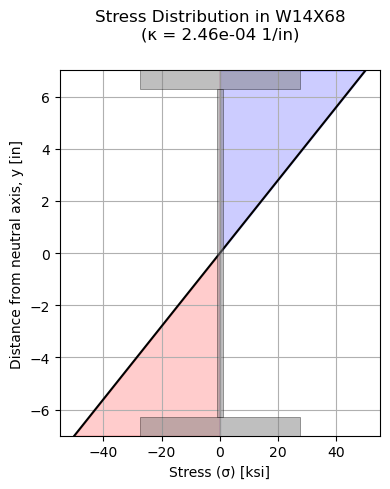

In [16]:
plot_stress(curv_y, SEC, STL)

In [17]:
def w_sec_moment_curvature(sec:AISCShape, mat:Material, max_curv: float):     
    d = sec.props['d']
    tf = sec.props['tf']
    tw = sec.props['tw']
    bf = sec.props['bf']
    
    curv = np.linspace(0, max_curv, 1000).reshape(-1, 1)
    y = np.linspace(-d/2, d/2, 1000).reshape(1, -1)
    delta_y = d / y.shape[1]
    
    eps = np.dot(curv, y)
    sigma = mat.stress(eps)
    force = np.where(abs(y) > (d / 2 - tf), sigma * bf * delta_y, sigma * tw * delta_y)
    moment = np.sum(force * y, axis=1) # moment about the centroid
  
    return {
        "moment": moment,
        "curvature": curv.flatten(), 
        "y": y, 
        "stress": sigma, 
        "force": force
    }    

In [18]:
MAX_CURV = 0.005 * np.pi

data = w_sec_moment_curvature(SEC, STL, MAX_CURV)

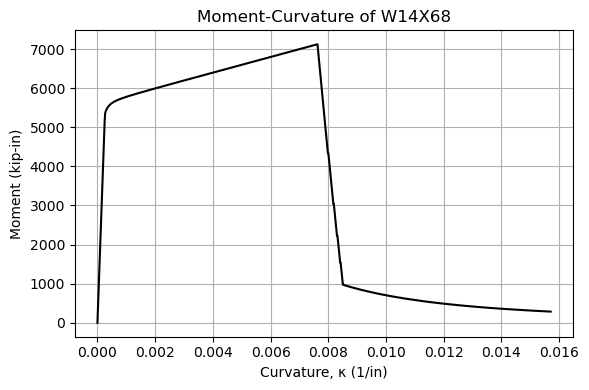

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(data["curvature"], data["moment"], color="black", label=SEC.label)
plt.xlabel(f"Curvature, \u03BA (1/in)")
plt.ylabel("Moment (kip-in)")
plt.title(f"Moment-Curvature of {SEC.label}")
plt.grid(True)
plt.tight_layout()
plt.show()

## Stress Distribution vs. Curvature

Let's first plot the stress distribution across the section at various curvatures. I will create the stress plots for 32 different curvature between zero and maximum curvature.

In [20]:
from tkinter import font


def plot_section_stress(nstep:int, ncols:int, curv:np.ndarray, y:np.ndarray, sigma:np.ndarray, figsize:tuple=(15, 10)):
    steps = np.linspace(0, curv.shape[0]-1, nstep, dtype=int)
    nrows = int(np.ceil(nstep / ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
    ax = ax.flatten()
    y = y.flatten()
    for i, step in enumerate(steps):
        ax[i].plot(sigma[step,:], y, color="black", label=f"\u03BA = {curv[step]:.2e} 1/in")
        tension = np.clip(sigma[step,:], 0, None)
        compression = np.clip(sigma[step,:], None, 0)
        ax[i].fill_betweenx(y, 0, tension, color="blue", alpha=0.2)
        ax[i].fill_betweenx(y, 0, compression, color="red", alpha=0.2)
        ax[i].text(
            0.5, 1.03, f"\u03BA = {curv[step]:.2e} 1/in",
            transform=ax[i].transAxes,
            ha='center', va='bottom', fontsize=9
        )
        ax[i].grid(True)
        
        ax_sec = ax[i].twiny()
        ax_sec = draw_wsec(ax_sec, SEC)
        ax_sec.set_ylim(ax[i].get_ylim())
        
    for i in range(nstep, len(ax)):
        fig.delaxes(ax[i])
    
    plt.suptitle(f"Stress Distribution in {SEC.label}")
    plt.tight_layout()
    plt.show()

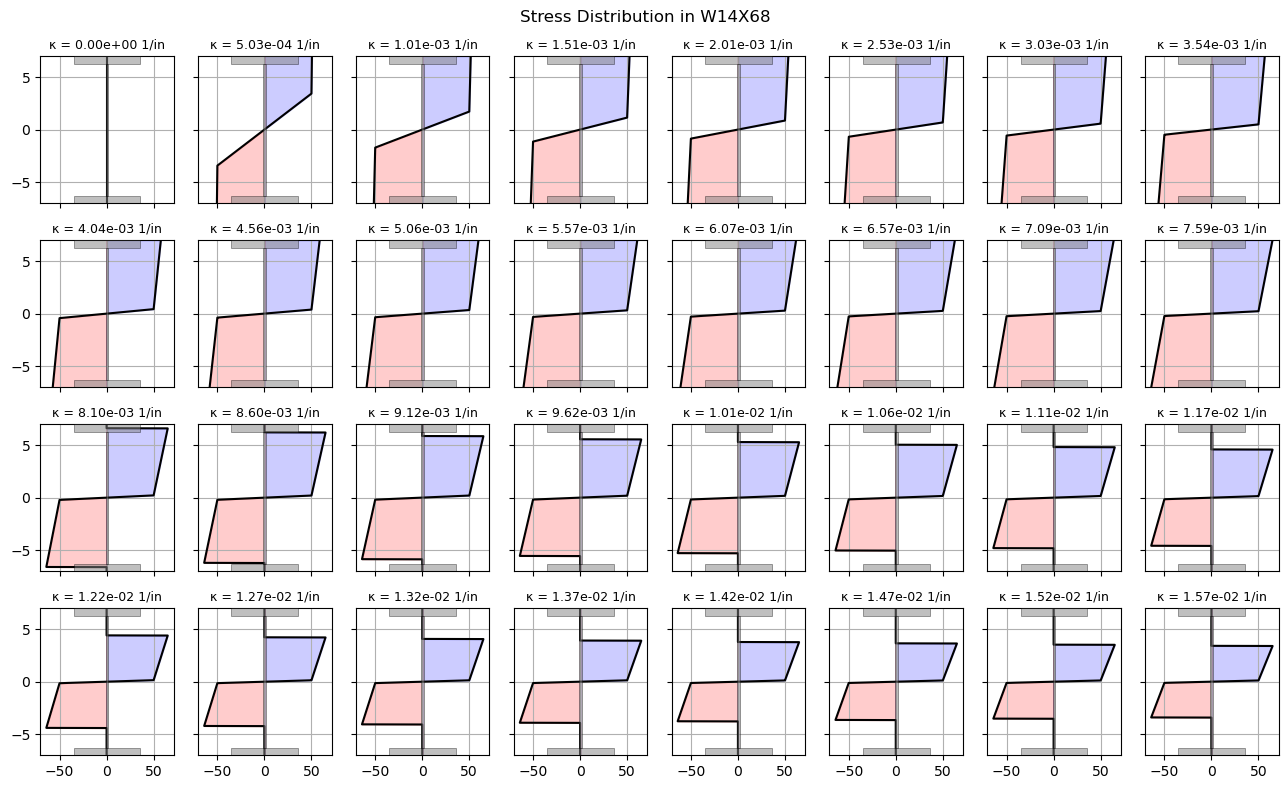

In [21]:
plot_section_stress(nstep=32, ncols=8, curv=data["curvature"], y=data["y"], sigma=data["stress"], figsize=(13, 8))

In the above plots, the vertical axis shows the height of section in inch, where zero is the neutral axis of the section. The horizontal axis shows the magnitude of the normal stress in section in ksi.

The plot at $\kappa=2.01 \times 10^{-4}\ \tfrac{1}{in}$ shows that both top and bottom flanges along with a portion of the web are fully yielded ($\sigma_s>\sigma_y=50 ksi$). At the curvature of $\kappa=2.23 \times 10^{-3}\ \tfrac{1}{in}$, alomst the entire section is yielded. From this point forward, apllying more moment causes the normal stress at the outter most fibers of the top and bottom flanges to drop to zero. This is because the normal strains at these fibers reaches the ultimate strain, $\epsilon_u$ of the material.

Moving forward, at $\kappa=2.63 \times 10^{-3}\ \tfrac{1}{in}$, the normal stress in both flanges drops to zero which causes a huge reduction in the moment capacity of the section as illustrated in the moment-curvature diagram.

The subsequent stress diagrams show the progression of the curvature as the section continues to loose it moment capacity.

In [22]:

def plot_combined_moment_curvature_with_stress(data:dict, sec:AISCShape, curvs:list, insets:list, inset_size: tuple):

    y = data["y"].flatten()
    sigma = data["stress"]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data["curvature"], data["moment"], label=sec.label, color='black', linewidth=5)
    ax.set_xlabel(f"Curvature, \u03BA (1/in)")
    ax.set_ylabel("Moment (kip-in)")
    ax.set_title(f"Moment-Curvature of {sec.label}")
    ax.grid(True)

    # Axis limits for normalization
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    for curv, inset in zip(curvs, insets):
        # Find the closest curvature index
        step = np.argmin(np.abs(data["curvature"] - curv))
        x_curv = data["curvature"][step]
        y_moment = data["moment"][step]
        ax.plot(x_curv, y_moment, 'ro')  # Mark the point on the main curve
        
        # Normalize coordinates to [0, 1] in axes fraction
        x_norm = (x_curv - xlim[0]) / (xlim[1] - xlim[0])
        y_norm = (y_moment - ylim[0]) / (ylim[1] - ylim[0])

        # Inset size in axis fraction
        inset_w, inset_h = inset_size

        # Adjust placement to avoid overlapping
        inset_x = x_norm + inset[0]*inset_size[0]#- inset_w / 2
        inset_y = y_norm + inset[1]*inset_size[1]#0.03  # a little above the point

        # Avoid going out of bounds
        inset_x = np.clip(inset_x, 0, 1 - inset_w)
        inset_y = np.clip(inset_y, 0, 1 - inset_h)

        # Create inset axis
        inset_ax = ax.inset_axes([inset_x, inset_y, inset_w, inset_h])
        inset_ax.plot(sigma[step, :], y, color='red', linewidth=1)
        inset_ax.fill_betweenx(y, 0, sigma[step, :], color="red", alpha=0.2)
        inset_ax.set_xticks([])
        inset_ax.set_yticks([])
        # inset_ax.set_facecolor("white")
        inset_ax.patch.set_alpha(0)
        for spine in inset_ax.spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.show()


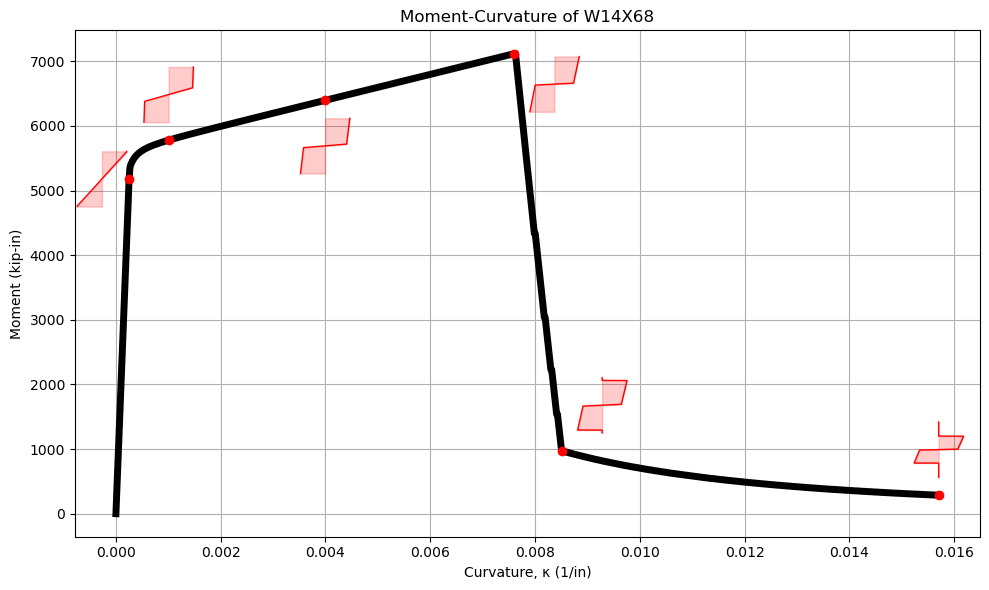

In [23]:
S = (0.06, 0.12)  # Inset size relative to main axes
CURVS = [0.000246, 0.001, 0.004, 0.00759, 0.0085, MAX_CURV]
INSETS = [(-1, -0.5), (-0.5, 0.25), (-0.5, -1.25), (0.25, -1), (0.25, 0.25), (-0.5, 0.25)]
plot_combined_moment_curvature_with_stress(data, SEC, CURVS, INSETS, inset_size=S)

In [60]:
import openseespy.opensees as ops
import opsvis as opsv

ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

ops.node(1, 0, 0)
ops.node(2, 1, 0)

ops.fix(1, 1, 1, 0)
ops.fix(2, 0, 1, 0)

coordTransf = "Linear"  # Linear, PDelta, Corotational
transfTag = 1
ops.geomTransf(coordTransf, transfTag)

matTag = 1
Fy = 50.0
E0 = 29000.0
b = 0.01 # strain hardening ratio
ops.uniaxialMaterial('Steel01', matTag, Fy, E0, b)

secTag = 1
d = SEC.props['d']
tf = SEC.props['tf']
tw = SEC.props['tw']
bf = SEC.props['bf']
Nfw = 12
Nff = 9
ops.section('WFSection2d', secTag, matTag, d, tw, bf, tf, Nfw, Nff)

intPoints = 5
intTag = 1
ops.beamIntegration('Lobatto', intTag, secTag, intPoints) # 'Lobatto', 'Legendre', 'NewtonCotes'

eleTag = 1
eleNodes = [1, 2]
# ops.element('dispBeamColumn', eleTag, *eleNodes, transfTag, intTag)
numIntgrPts = 5
intType = "Lobatto"
ops.element('nonlinearBeamColumn', eleTag, *eleNodes, numIntgrPts, secTag, transfTag, '-integration', intType)

timeSeriesTag = 1
ops.timeSeries("Constant", timeSeriesTag) # Linear, Constant

patternTag = 1
ops.pattern("Plain", patternTag, timeSeriesTag)

ops.load(2, 1.0, 0, 0)

nodeTag = 2
dof = 1
numIncr = 1000
u_max = 1.0
incr = u_max / numIncr
# ops.integrator('LoadControl', incr)
ops.integrator('DisplacementControl', nodeTag, dof, incr)

ops.system('BandGen') # BandGen, BandSPD
ops.numberer('Plain') # Plain, RCM, AMD
ops.constraints("Plain") # Plain, Transformation
ops.algorithm('ModifiedNewton')
ops.test('NormDispIncr', 1.0e-12, 1000)



           
ops.analysis('Static') # Static, Transient, VariableTransient, PFEM

ops.recorder('Node', '-file', 'node_disp.out', '-time', '-node', 2, '-dof', 1, 'disp')
ops.recorder('Node', '-file', 'reaction.out', '-time', '-node', 1, '-dof', 1, 'reaction')


ops.analyze(numIncr)


0

In [61]:
ops.getTime()

3822861.5962119573

In [62]:
ops.eleForce(1)

[-6658.409800000007,
 -1.1430278972290373e-25,
 2.3874235921539197e-12,
 6658.409800000007,
 1.1430278972290373e-25,
 -2.387423592154034e-12]

In [63]:
ops.nodeDisp(2, 1)

1.000000000000001

<Axes: >

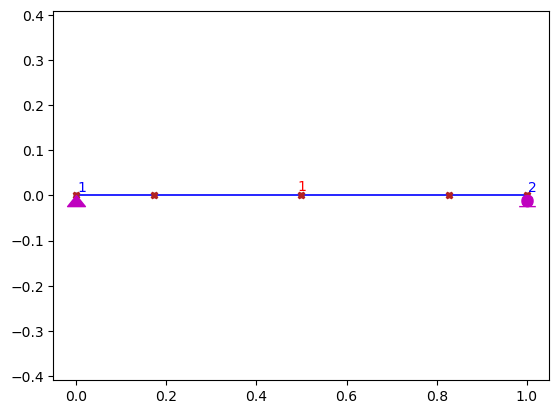

In [64]:

opsv.plot_model()

0.0999999999999999

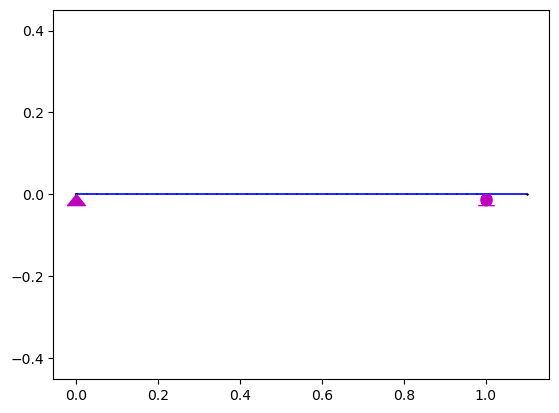

In [65]:
opsv.plot_defo()

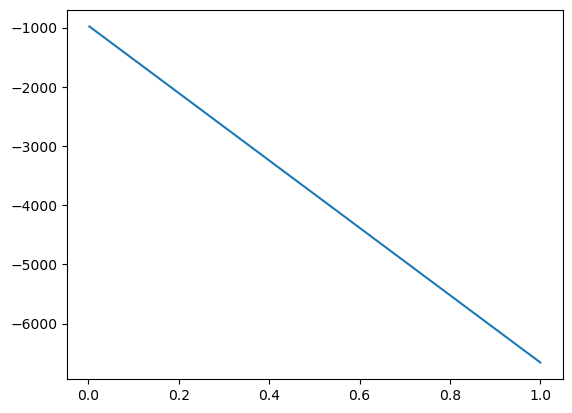

In [66]:

from contextlib import ExitStack

filenames = ["node_disp.out", "reaction.out"]

with ExitStack() as stack:
    files = [stack.enter_context(open(fname, "r")) for fname in filenames]
    lines1 = files[0].readlines()
    lines2 = files[1].readlines()
    strains = np.array([float(line.split()[1]) for line in lines1[1:]])
    reactions = np.array([float(line.split()[1]) for line in lines2[1:]])
    
plt.plot(strains, reactions)

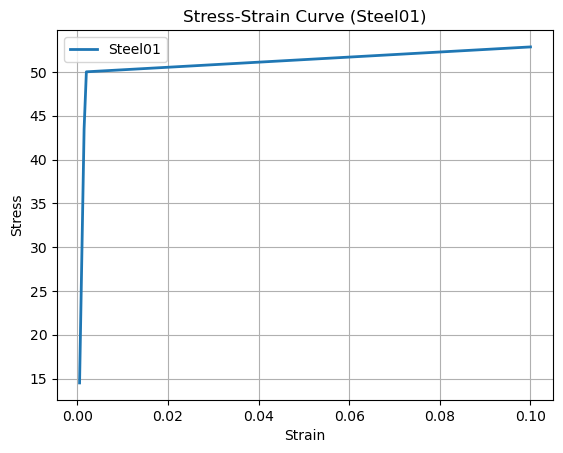

In [74]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt

# -------------------------------
# Model Initialization
# -------------------------------
ops.wipe()
ops.model('basic', '-ndm', 1, '-ndf', 1)

# -------------------------------
# Geometry & Material
# -------------------------------
L = 1.0  # length of bar
A = 1.0  # area of bar

# Nodes
ops.node(1, 0.0)
ops.node(2, L)

# Fix left end
ops.fix(1, 1)

# Define material: Steel01(tag, Fy, E0, b)
Fy = 50.0           # ksi
E0 = 29000.0        # ksi (realistic steel)
b = 0.001            # strain hardening ratio
ops.uniaxialMaterial('Steel01', 1, Fy, E0, b)

# Define element
ops.element('truss', 1, 1, 2, A, 1)

# -------------------------------
# Load & Analysis Setup
# -------------------------------
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
ops.load(2, 1e-8)  # Dummy load to satisfy pattern requirements

# Analysis parameters
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-8, 10)
ops.algorithm('Newton')

# Set displacement control
max_disp = 0.1      # 10% strain
n_steps = 200
disp_inc = max_disp / n_steps
ops.integrator('DisplacementControl', 2, 1, disp_inc)
ops.analysis('Static')

# -------------------------------
# Analysis Execution
# -------------------------------
disp_vals = []
strain_vals = []
stress_vals = []

for step in range(n_steps):
    ok = ops.analyze(1)
    if ok != 0:
        print(f"Analysis failed at step {step}")
        break

    disp = ops.nodeDisp(2, 1)
    strain = disp / L
    force = ops.eleResponse(1, 'axialForce')[0]  # Extract scalar from list
    stress = force / A
    disp_vals.append(disp)
    strain_vals.append(strain)
    stress_vals.append(stress)

# -------------------------------
# Plot Stress-Strain Curve
# -------------------------------
plt.plot(strain_vals, stress_vals, label="Steel01", linewidth=2)
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Stress-Strain Curve (Steel01)")
plt.grid(True)
plt.legend()
plt.show()


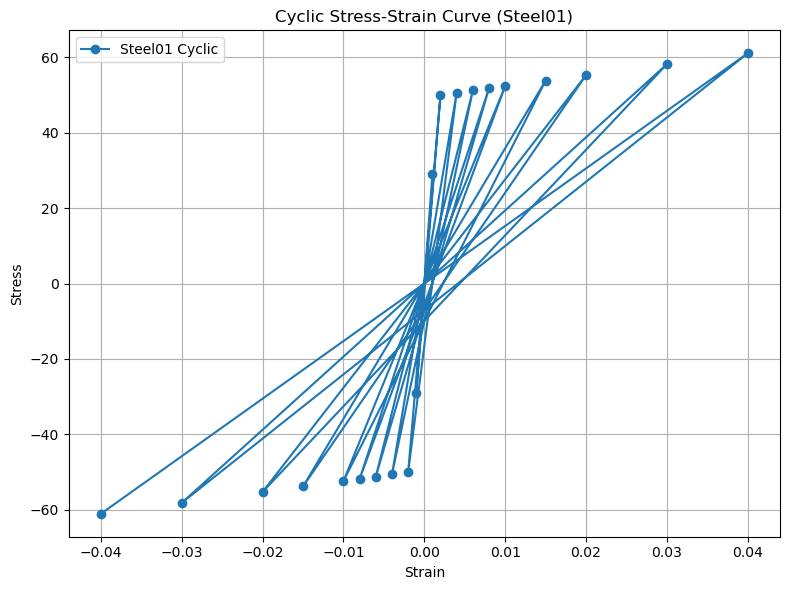

In [75]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt

# -------------------------------
# Initialize Model
# -------------------------------
ops.wipe()
ops.model('basic', '-ndm', 1, '-ndf', 1)

# -------------------------------
# Geometry & Material
# -------------------------------
L = 1.0  # bar length
A = 1.0  # bar area

# Nodes
ops.node(1, 0.0)
ops.node(2, L)
ops.fix(1, 1)  # Fix node 1

# Steel01: uniaxialMaterial('Steel01', matTag, Fy, E0, b)
Fy = 50.0
E0 = 29000.0
b = 0.01
ops.uniaxialMaterial('Steel01', 1, Fy, E0, b)

# Element
ops.element('truss', 1, 1, 2, A, 1)

# -------------------------------
# Loading Pattern (dummy)
# -------------------------------
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
ops.load(2, 1e-8)  # Required dummy load

# -------------------------------
# Analysis Setup
# -------------------------------
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-8, 10)
ops.algorithm('Newton')
ops.integrator('DisplacementControl', 2, 1, 0.0)  # Will be updated manually
ops.analysis('Static')

# -------------------------------
# Strain History (mimics the 10 runs in Steel01 doc)
# -------------------------------
strain_history = [
    0.001, -0.001,
    0.002, -0.002,
    0.004, -0.004,
    0.006, -0.006,
    0.008, -0.008,
    0.010, -0.010,
    0.015, -0.015,
    0.020, -0.020,
    0.030, -0.030,
    0.040, -0.040
]

# Each strain level will be converted to displacement
target_disps = [L * eps for eps in strain_history]

# -------------------------------
# Run Cyclic Analysis
# -------------------------------
disp_vals = []
strain_vals = []
stress_vals = []

current_disp = 0.0

for target_disp in target_disps:
    step_disp = target_disp - current_disp
    ops.integrator('DisplacementControl', 2, 1, step_disp)
    ok = ops.analyze(1)

    if ok != 0:
        print(f"Analysis failed at step targeting disp {target_disp:.6f}")
        break

    current_disp = target_disp
    strain = current_disp / L
    force = ops.eleResponse(1, 'axialForce')[0]
    stress = force / A
    disp_vals.append(current_disp)
    strain_vals.append(strain)
    stress_vals.append(stress)

# -------------------------------
# Plot Results
# -------------------------------
plt.figure(figsize=(8, 6))
plt.plot(strain_vals, stress_vals, marker='o', label="Steel01 Cyclic", linewidth=1.5)
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Cyclic Stress-Strain Curve (Steel01)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


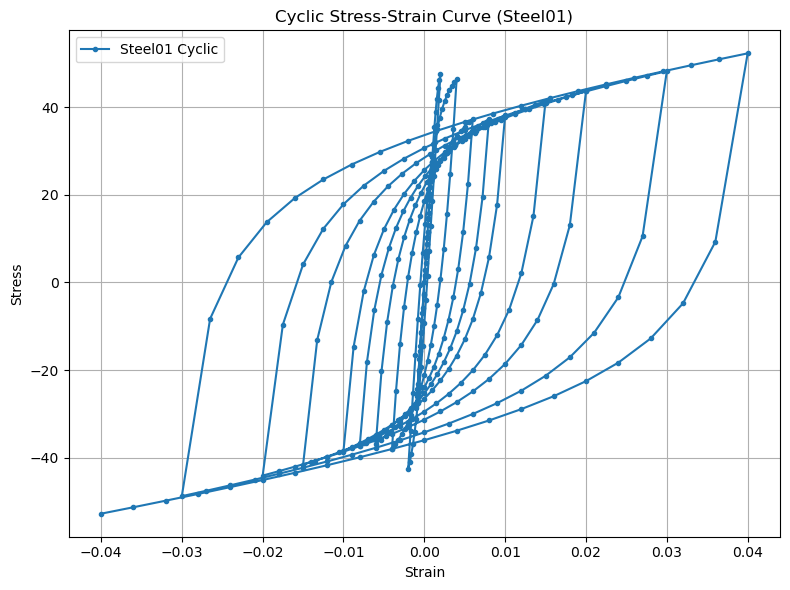

In [ ]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt
import numpy as np

# Reset model
ops.wipe()
ops.model('basic', '-ndm', 1, '-ndf', 1)

# Geometry and material
L = 1.0
A = 1.0
Fy = 50.0
E0 = 29000.0
b = 0.01
fixed_nodeTag = 1
free_nodeTag = 2
ops.node(fixed_nodeTag, 0.0)
ops.node(free_nodeTag, L)
ops.fix(fixed_nodeTag, 1)
matTag1 = 1
ops.uniaxialMaterial('Steel01', matTag1, Fy, E0, b)
matTag2 = 2
R0, cR1, cR2 = 10, 0.925, 0.15
ops.uniaxialMaterial('Steel02', matTag2, Fy, E0, b, R0, cR1, cR2)
eleTag = 1
nodeTags = [1, 2]
ops.element('truss', eleTag, *nodeTags, A, matTag2)

# Dummy load pattern
timeSeriesTag = 1
ops.timeSeries('Linear', timeSeriesTag)
patternTag = 1
ops.pattern('Plain', patternTag, timeSeriesTag)
ops.load(2, 1e-8)

# Analysis settings
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1e-8, 10)
ops.algorithm('Newton')


# Define cyclic strain history (OpenSees doc example)
# https://opensees.berkeley.edu/OpenSees/manuals/comparisonManual/2770.htm
strain_peaks = [0.001, -0.001, 0.002, -0.002, 0.004, -0.004,
                0.006, -0.006, 0.008, -0.008, 0.01, -0.01,
                0.015, -0.015, 0.02, -0.02, 0.03, -0.03,
                0.04, -0.04]
displacement_peaks = [L * eps for eps in strain_peaks]

# Incremental stepping
n_increments = 20
strain_vals, stress_vals = [], []
dof = 1

current_disp = 0.0
for target_disp in displacement_peaks:
    delta_disp = (target_disp - current_disp) / n_increments
    for _ in range(n_increments):
        ops.integrator('DisplacementControl', free_nodeTag, dof, delta_disp)
        ops.analysis('Static')
        ok = ops.analyze(1)
        if ok != 0:
            print(f"Analysis failed during increment to {target_disp}")
            break
        current_disp += delta_disp
        strain = current_disp / L
        stress = ops.eleResponse(eleTag, 'axialForce')[0] / A
        strain_vals.append(strain)
        stress_vals.append(stress)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(strain_vals, stress_vals, label='Steel01 Cyclic', marker='.')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Cyclic Stress-Strain Curve (Steel01)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


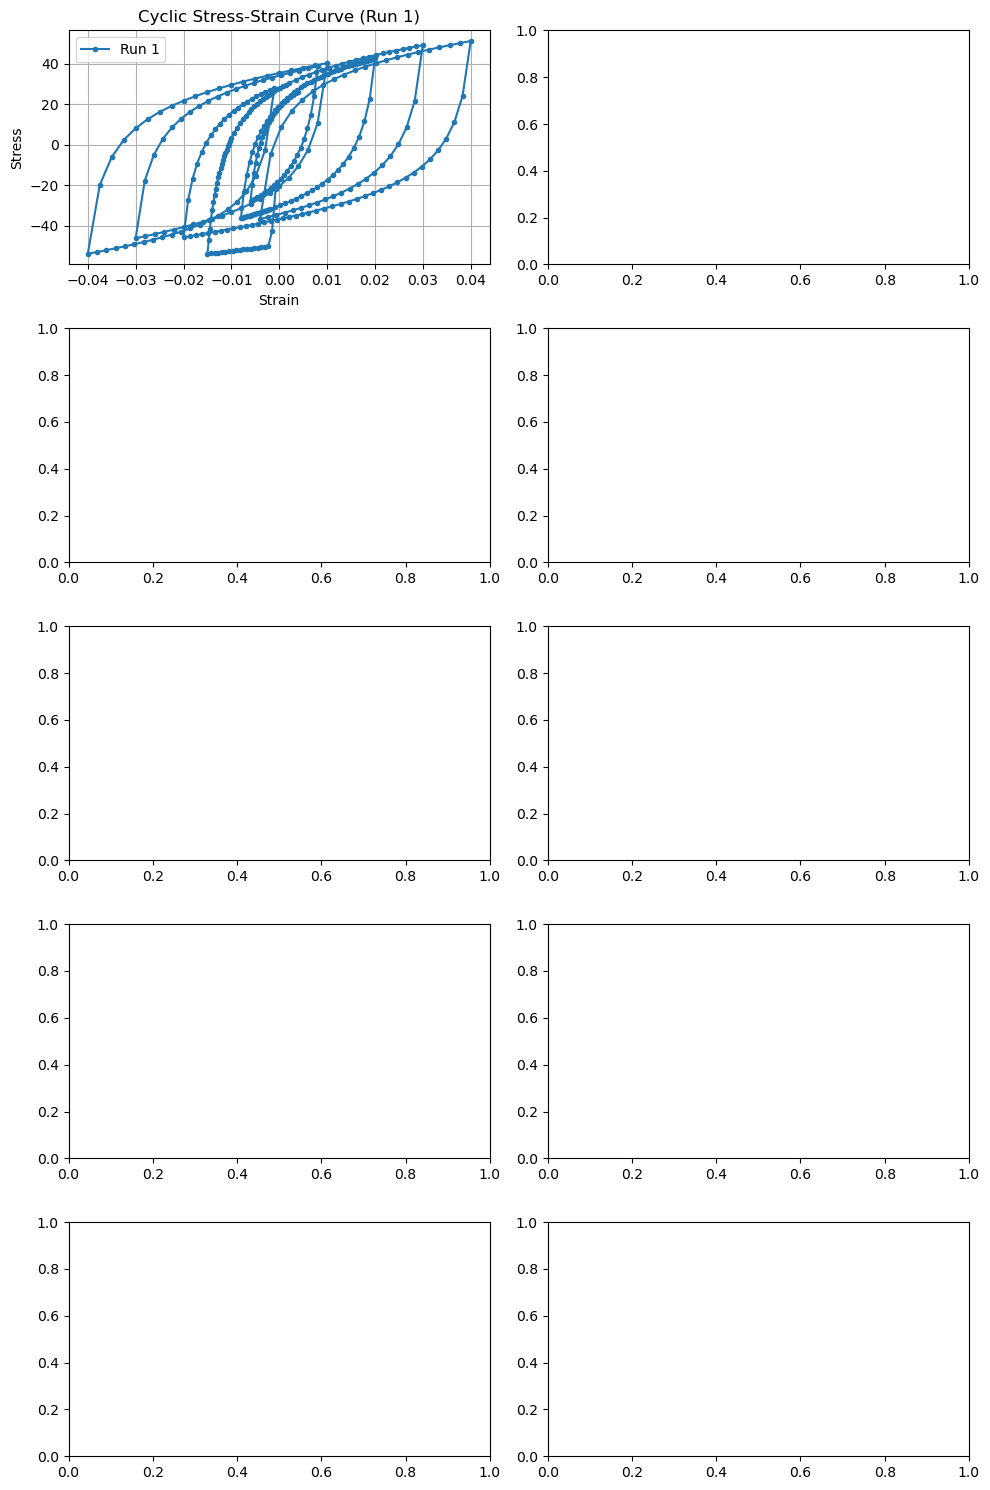

In [96]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt
import numpy as np

# Reset model
ops.wipe()
ops.model('basic', '-ndm', 1, '-ndf', 1)

# Geometry and material
L = 1.0
A = 1.0
Fy = 50.0
E0 = 29000.0
b = 0.01
fixed_nodeTag = 1
free_nodeTag = 2
ops.node(fixed_nodeTag, 0.0)
ops.node(free_nodeTag, L)
ops.fix(fixed_nodeTag, 1)
matTag1 = 1
ops.uniaxialMaterial('Steel01', matTag1, Fy, E0, b)
matTag2 = 2
R0, cR1, cR2 = 10, 0.925, 0.15
ops.uniaxialMaterial('Steel02', matTag2, Fy, E0, b, R0, cR1, cR2)
eleTag = 1
nodeTags = [1, 2]
ops.element('truss', eleTag, *nodeTags, A, matTag2)

# Dummy load pattern
timeSeriesTag = 1
ops.timeSeries('Linear', timeSeriesTag)
patternTag = 1
ops.pattern('Plain', patternTag, timeSeriesTag)
ops.load(2, 1e-8) # Required dummy load

# Analysis settings
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1e-8, 10)
ops.algorithm('Newton')

# Cyclic strain history (OpenSees doc example)
# https://opensees.berkeley.edu/OpenSees/manuals/comparisonManual/2770.htm
strain_peaks = [0.001, -0.001, 0.002, -0.002, 0.004, -0.004,
                0.006, -0.006, 0.008, -0.008, 0.01, -0.01,
                0.015, -0.015, 0.02, -0.02, 0.03, -0.03,
                0.04, -0.04]

# Number of runs and subplots
num_runs = 1
n_increments = 20
dof = 1

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 15))  # 5 rows, 2 columns

# Loop over each run
for run in range(num_runs):
    strain_vals, stress_vals = [], []
    
    # Vary the strain peaks for each run (you can adjust this for different loading scenarios)
    random_strain_peaks = np.random.choice(strain_peaks, len(strain_peaks), replace=False)
    
    displacement_peaks = [L * eps for eps in random_strain_peaks]
    current_disp = 0.0
    
    for target_disp in displacement_peaks:
        delta_disp = (target_disp - current_disp) / n_increments
        for _ in range(n_increments):
            ops.integrator('DisplacementControl', free_nodeTag, dof, delta_disp)
            ops.analysis('Static')
            ok = ops.analyze(1)
            if ok != 0:
                print(f"Analysis failed during increment to {target_disp}")
                break
            current_disp += delta_disp
            strain = current_disp / L
            stress = ops.eleResponse(eleTag, 'axialForce')[0] / A
            strain_vals.append(strain)
            stress_vals.append(stress)
    
    # Plot results for this run
    ax = axes[run // 2, run % 2]  # Select subplot location
    ax.plot(strain_vals, stress_vals, label=f'Run {run+1}', marker='.')
    ax.set_xlabel('Strain')
    ax.set_ylabel('Stress')
    ax.set_title(f'Cyclic Stress-Strain Curve (Run {run+1})')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


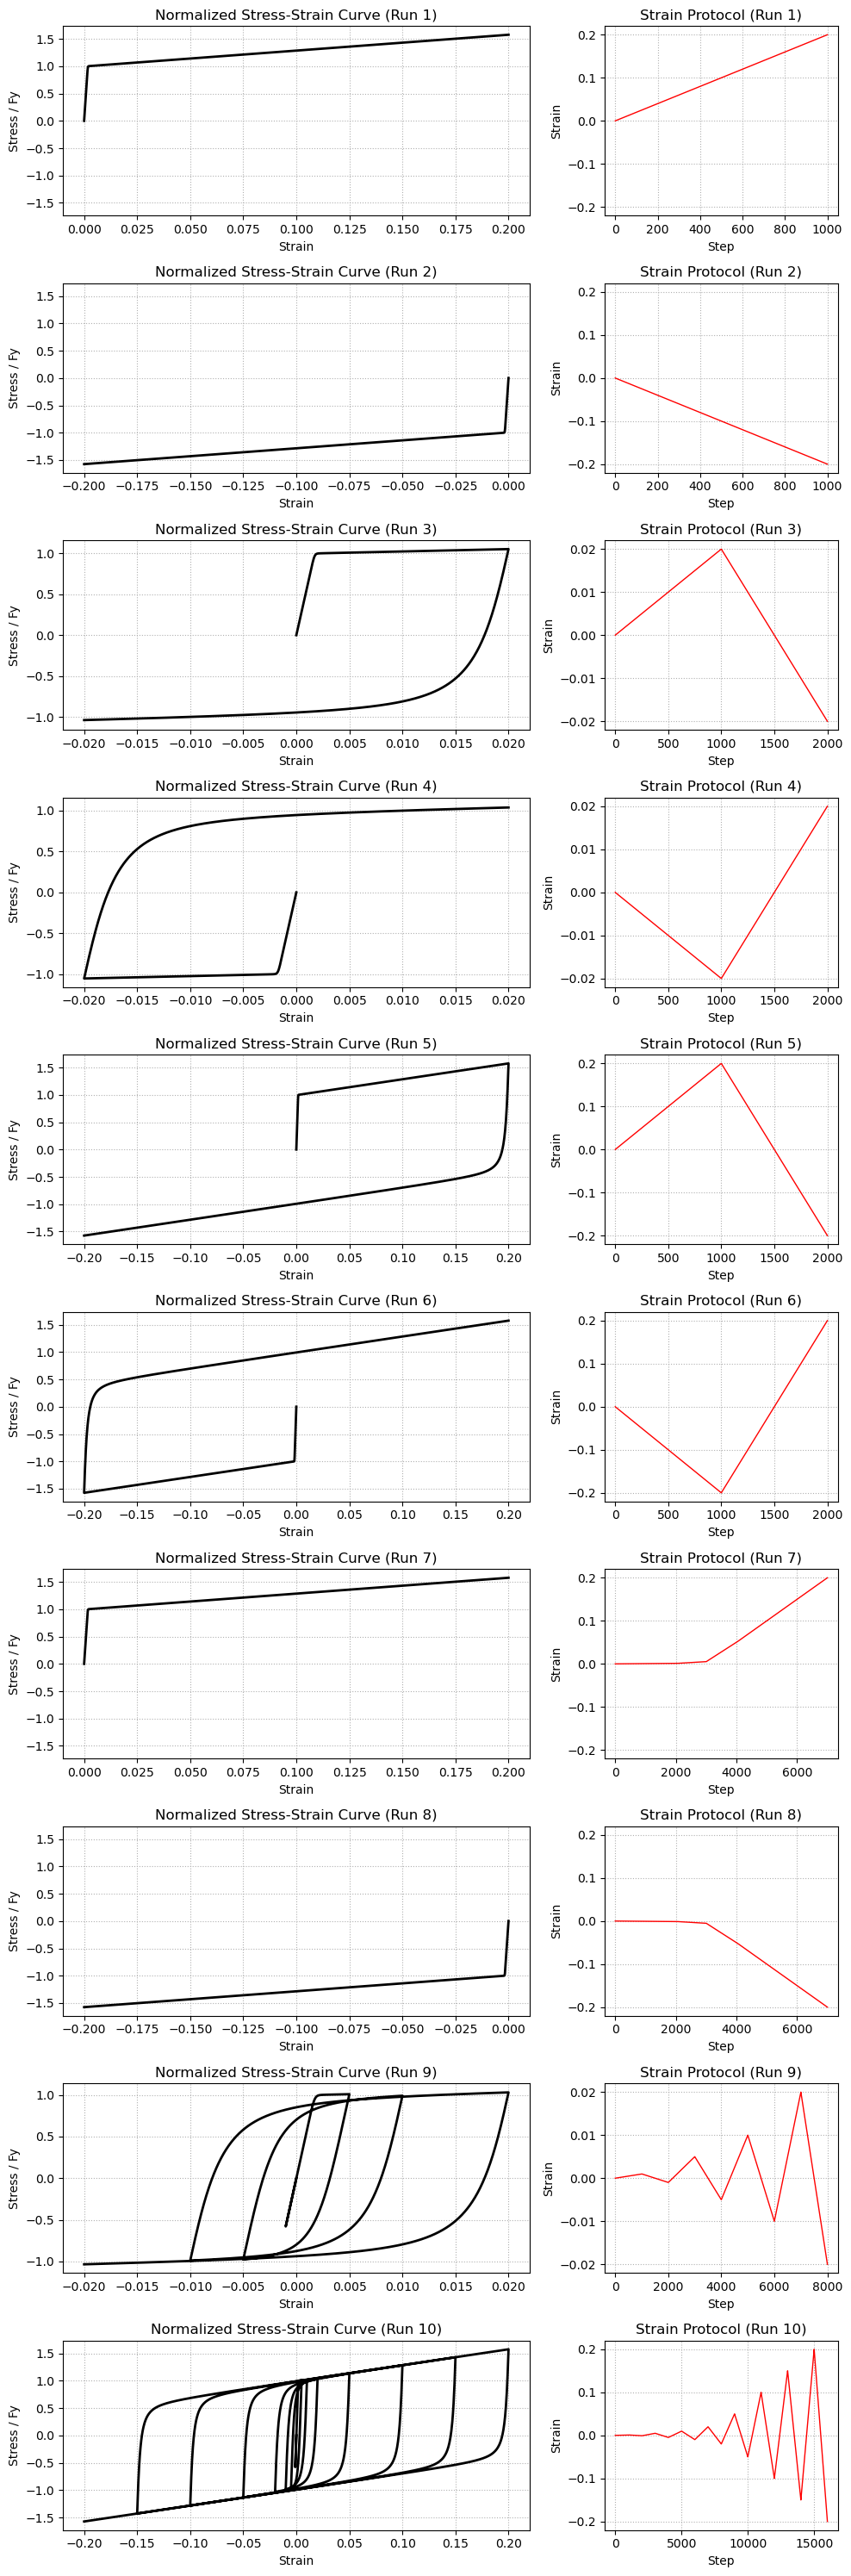

In [ ]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt
import numpy as np

# Reset model
ops.wipe()
ops.model('basic', '-ndm', 1, '-ndf', 1)

# Geometry and material
L = 1.0
A = 1.0
Fy = 50.0
E0 = 29000.0
b = 0.005
fixed_nodeTag = 1
free_nodeTag = 2
ops.node(fixed_nodeTag, 0.0)
ops.node(free_nodeTag, L)
ops.fix(fixed_nodeTag, 1)
matTag1 = 1
ops.uniaxialMaterial('Steel01', matTag1, Fy, E0, b)
matTag2 = 2
R0, cR1, cR2 = 20, 0.925, 0.15
ops.uniaxialMaterial('Steel02', matTag2, Fy, E0, b, R0, cR1, cR2)
eleTag = 1
nodeTags = [1, 2]
ops.element('truss', eleTag, *nodeTags, A, matTag2)

# Dummy load pattern
timeSeriesTag = 1
ops.timeSeries('Linear', timeSeriesTag)
patternTag = 1
ops.pattern('Plain', patternTag, timeSeriesTag)
ops.load(2, 1e-8) # Required dummy load

# Analysis settings
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1e-8, 10)
ops.algorithm('Newton')

# Cyclic strain history (OpenSees doc example)
# https://opensees.berkeley.edu/OpenSees/manuals/comparisonManual/2770.htm
run1 = [0.20]
run2 = [-0.20]
run3 = [0.02, -0.02]
run4 = [-0.02, 0.02]
run5 = [0.20, -0.20]
run6 = [-0.20, 0.20]
run7 = [0.0005, 0.001, 0.005, 0.05, 0.10, 0.15, 0.20]
run8 = [-0.0005, -0.001, -0.005, -0.05, -0.10, -0.15, -0.20]
run9 = [0.001, -0.001, 0.005, -0.005, 0.01, -0.01, 0.02, -0.02]
run10 = [0.001, -0.001, 0.005, -0.005, 0.01, -0.01, 0.02, -0.02, 0.05, -0.05, 0.10, -0.10, 0.15, -0.15, 0.20, -0.20]
runs = [run1, run2, run3, run4, run5, run6, run7, run8, run9, run10]

# Number of runs and subplots
num_runs = len(runs)
n_increments = 1000
dof = 1

# Create subplots
fig, axes = plt.subplots(num_runs, 2, figsize=(10, 30), width_ratios=[2,1])

# Loop over each run
for i, run in enumerate(runs):
    ops.reset()
    strain_vals, stress_vals = [0], [0]
    strain_peaks = run
    
    displacement_peaks = [L * eps for eps in strain_peaks]
    current_disp = 0.0
    
    for target_disp in displacement_peaks:
        delta_disp = (target_disp - current_disp) / n_increments
        for _ in range(n_increments):
            ops.integrator('DisplacementControl', free_nodeTag, dof, delta_disp)
            ops.analysis('Static')
            ok = ops.analyze(1)
            if ok != 0:
                print(f"Analysis failed during increment to {target_disp}")
                break
            current_disp += delta_disp
            strain = current_disp / L
            stress = ops.eleResponse(eleTag, 'axialForce')[0] / A
            strain_vals.append(strain)
            stress_vals.append(stress)
    
    # Plot results for this run
    ax = axes[i, 0]
    norm_stress_vals = np.array(stress_vals) / Fy  # Normalize stress by yield strength
    ax.plot(strain_vals, norm_stress_vals, color='black', linewidth=2, label=f'Run {i+1}')
    max_abs_norm_stress = max(abs(norm_stress_vals))
    ax.set_ylim(-1.1*max_abs_norm_stress, 1.1*max_abs_norm_stress)
    ax.set_xlabel('Strain')
    ax.set_ylabel('Stress / Fy')
    ax.set_title(f'Normalized Stress-Strain Curve (Run {i+1})')
    ax.grid(True, linestyle=':')
 
    ax = axes[i, 1]
    ax.plot(range(n_increments * len(run)+1), strain_vals, color='red', linewidth=1, label=f'Run {i+1}')
    max_abs_strain = max(abs(np.array(strain_vals)))
    ax.set_ylim(-1.1*max_abs_strain, 1.1*max_abs_strain)
    ax.set_xlabel('Step')
    ax.set_ylabel('Strain')
    ax.set_title(f'Strain Protocol (Run {i+1})')
    ax.grid(True, linestyle=':')

plt.tight_layout()
plt.show()
